In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('IncidentiModificato.xlsx')
df.head()

,VERBALE,DATA,SESSO,ANNI,PESO,ALTEZZA,BMI,Mezzo,Testa:Neurocranio,Testa:Splancnocranio,...,Scheletro:Rachide-cervicale,Scheletro:Rachide-toracico,Scheletro:Rachide-lombare,Scheletro:Bacino-e-sacro,Scheletro:Complesso-sterno/claveo/costale,Tot Testa,Tot Torace,Tot Addome,Tot Scheletro,Totale
0,85567,1999-10-29,0,81,84.0,1.75,27.428571,0,1,0,...,0,3,0,3,3,2,0,3,9,14
1,85829,2000-01-14,1,69,69.0,1.62,26.291724,1,4,4,...,0,0,0,0,4,20,7,1,4,32
2,85977,2000-03-10,1,71,67.0,1.55,27.887617,1,2,0,...,0,0,0,0,4,6,0,0,4,10
3,86220,2000-06-14,1,54,60.0,1.59,23.733238,1,4,0,...,0,0,0,0,4,5,3,2,4,14
4,86247,2000-06-22,1,78,69.0,1.67,24.740937,1,2,0,...,0,0,0,0,4,2,0,2,4,8


In [3]:
X = df.drop(columns=['VERBALE', 'DATA', 'Mezzo'])
y = df['Mezzo']

In [4]:
def scatter(x, labels):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(2):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, [0,1][i], fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

In [6]:
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

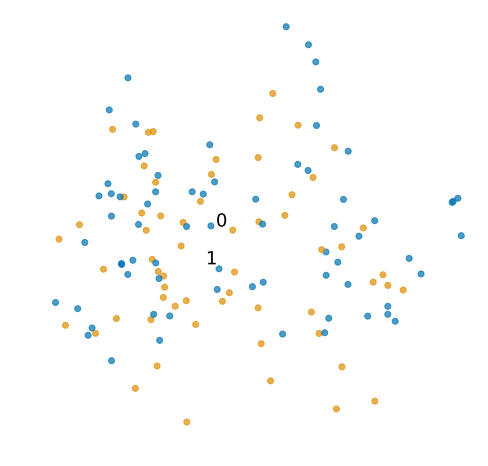

In [7]:
fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int))
plt.show()

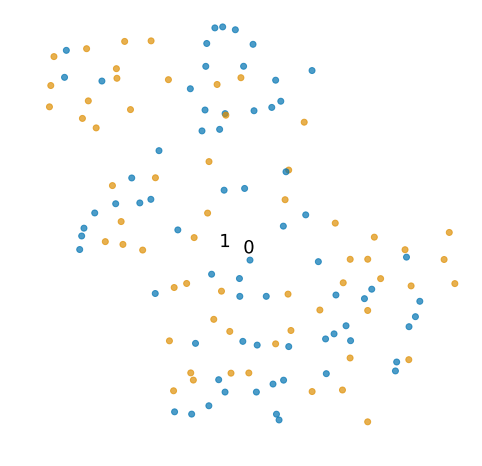

In [8]:
from sklearn.manifold import TSNE

X_tsne = TSNE(perplexity=40, n_iter = 500, method='exact').fit_transform(X)

fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int))
plt.show()

In [11]:
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.SparseRandomProjection()
X_new = transformer.fit_transform(X)


array([[-0.55705359,  0.30126125,  0.27359841, ...,  0.97966467,
        -1.25800612, -0.27939871],
       [-0.56506401,  0.39653749, -0.35083156, ...,  1.10426366,
         0.03876796, -0.49628476],
       [-0.30608794, -0.4027293 ,  0.64504722, ...,  1.55151493,
        -0.7607338 ,  0.5233646 ],
       ...,
       [-0.35089608, -0.13110466, -0.48200803, ...,  1.50400802,
        -0.47671537, -0.3811736 ],
       [-0.51796047, -0.21745288,  0.45967029, ...,  0.67536285,
        -0.8880233 ,  0.60050853],
       [-1.04573405,  0.13357546, -0.61846221, ...,  2.05756782,
        -0.99825226, -1.23381067]])